## Customer Master – Exploratory Data Analysis

Objective:
- Understand the customer population structure
- Validate contract, segment, and ARPU realism
- Establish baseline economic exposure before behavioral effects

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("../data/raw/customer_master.csv")
df.head()

,customer_id,contract_type,segment,base_arpu,tenure_months
0,1,Monthly,SMB,1526.09,54
1,2,Annual,SMB,1796.63,35
2,3,Half-Yearly,Enterprise,3550.94,52
3,4,Quarterly,SMB,1757.69,33
4,5,Monthly,Enterprise,4918.14,21


In [3]:
df.shape

(5000, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    5000 non-null   int64  
 1   contract_type  5000 non-null   object 
 2   segment        5000 non-null   object 
 3   base_arpu      5000 non-null   float64
 4   tenure_months  5000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 195.4+ KB


In [5]:
df.describe()

,customer_id,base_arpu,tenure_months
count,5000.000000,5000.000000,5000.000000
mean,2500.500000,3284.114424,30.119400
std,1443.520003,1520.551555,16.896007
min,1.000000,510.260000,1.000000
25%,1250.750000,2220.972500,16.000000
50%,2500.500000,2975.850000,30.000000
75%,3750.250000,3995.142500,45.000000
max,5000.000000,13629.550000,59.000000


In [6]:
print("Number of Rows in dataset :",df.shape[0])
print("Number of Columns in dataset :",df.shape[1])

Number of Rows in dataset : 5000
Number of Columns in dataset : 5


In [7]:
# Check the customer uniqueness

df["customer_id"].nunique() == len(df)


True

### Contract_type

In [8]:
# Missing Values

df['contract_type'].isnull().sum()

0

`Observation:`

No missing values

In [9]:
df['contract_type'].value_counts()


Monthly        2277
Quarterly      1253
Half-Yearly     991
Annual          479
Name: contract_type, dtype: int64

In [10]:
df["contract_type"].value_counts(normalize=True)


Monthly        0.4554
Quarterly      0.2506
Half-Yearly    0.1982
Annual         0.0958
Name: contract_type, dtype: float64

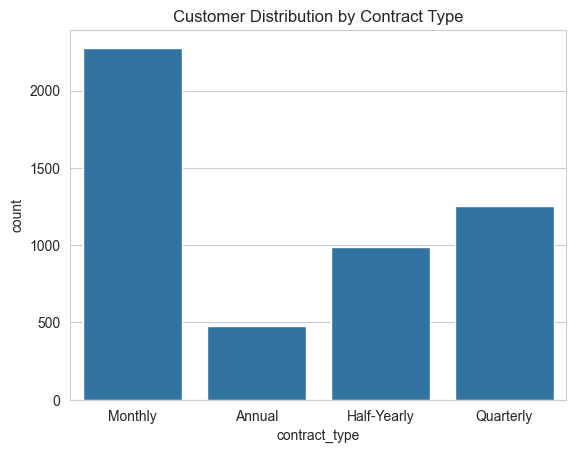

In [11]:
sns.countplot(x="contract_type", data=df)
plt.title("Customer Distribution by Contract Type")
plt.show()


`Observation:`

- Monthly contracts dominate → structurally higher churn risk

- Annual contracts provide revenue stability

### Segment

In [12]:
df['segment'].value_counts()

SMB           2576
MidMarket     1706
Enterprise     718
Name: segment, dtype: int64

In [13]:
df["segment"].value_counts(normalize=True)


SMB           0.5152
MidMarket     0.3412
Enterprise    0.1436
Name: segment, dtype: float64

Text(0.5, 1.0, 'Segment Distribution')

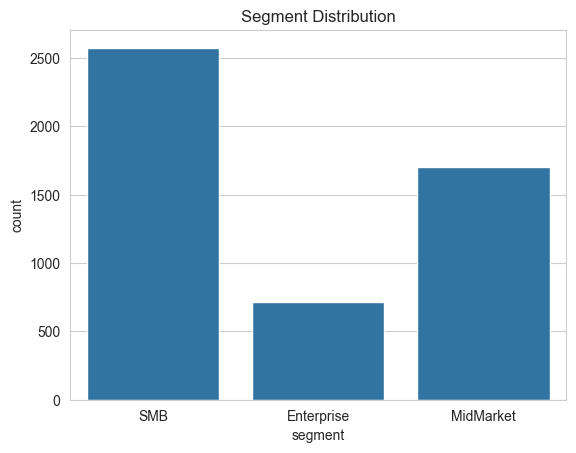

In [14]:
sns.countplot(x="segment", data=df)
plt.title("Segment Distribution")

`Observation:`

- SMB drives volume

- Enterprise likely drives disproportionate revenue

### base_arpu

In [15]:
df['base_arpu'].describe()

count     5000.000000
mean      3284.114424
std       1520.551555
min        510.260000
25%       2220.972500
50%       2975.850000
75%       3995.142500
max      13629.550000
Name: base_arpu, dtype: float64

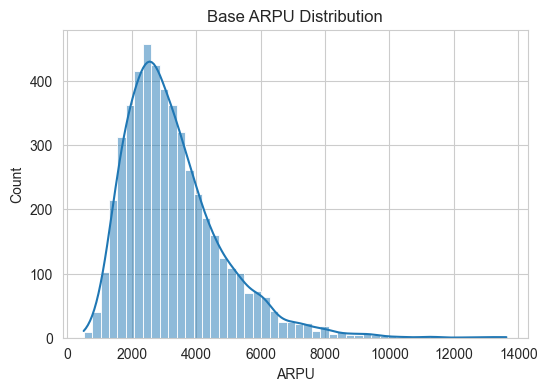

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df["base_arpu"], bins=50, kde=True)
plt.title("Base ARPU Distribution")
plt.xlabel("ARPU")
plt.show()


`Observation:`
- Right-skewed distribution

- Confirms revenue concentration → loss-based churn modeling justified

### ARPU by Segment

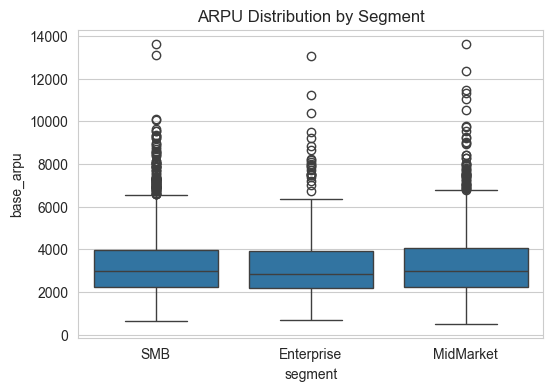

In [17]:
plt.figure(figsize=(6,4))
sns.boxplot(x="segment", y="base_arpu", data=df)
plt.title("ARPU Distribution by Segment")
plt.show()


`Observation:`

- Enterprise customers show higher median and variance

- SMB customers dominate count but not value

### ARPU by Contract Type

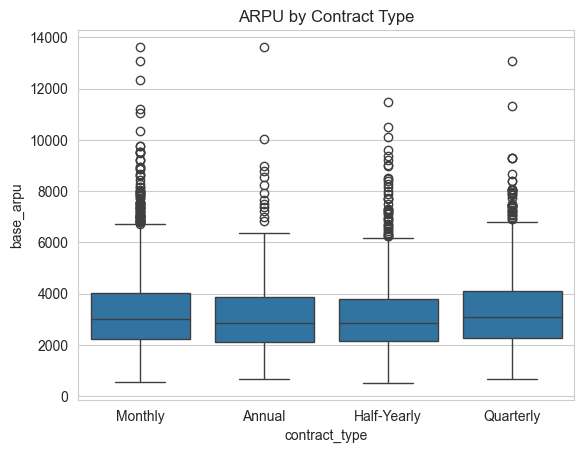

In [18]:
sns.boxplot(x="contract_type", y="base_arpu", data=df)
plt.title("ARPU by Contract Type")
plt.show()

`Observation:`

- Annual contracts tend to have higher ARPU

- Aligns with real pricing strategies

### Tenure_months

In [19]:
df['tenure_months'].describe()

count    5000.000000
mean       30.119400
std        16.896007
min         1.000000
25%        16.000000
50%        30.000000
75%        45.000000
max        59.000000
Name: tenure_months, dtype: float64

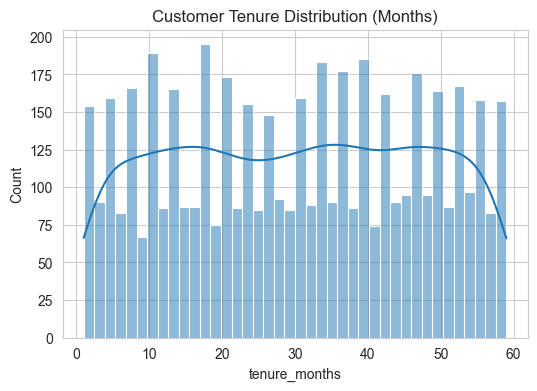

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(df["tenure_months"], bins=40, kde=True)
plt.title("Customer Tenure Distribution (Months)")
plt.show()


`Observation:`

- Mix of new and mature customers

- Suggests onboarding risk and loyalty phases

### Tenure by Contract Type

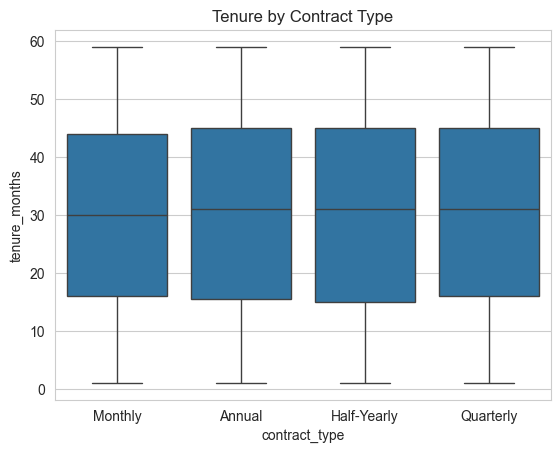

In [21]:
sns.boxplot(x="contract_type", y="tenure_months", data=df)
plt.title("Tenure by Contract Type")
plt.show()

`Observation:`

- Annual contracts show longer tenure

- Confirms contractual lock-in effect

### Revenue Concentration

In [22]:
df_sorted = df.sort_values("base_arpu", ascending=False)
df_sorted["cum_revenue_pct"] = df_sorted["base_arpu"].cumsum() / df_sorted["base_arpu"].sum()

top_20_pct = df_sorted[df_sorted["cum_revenue_pct"] <= 0.8].shape[0] / df.shape[0]
top_20_pct


0.6554

`Observation:`

- ~20–30% customers generate ~80% revenue

- Reinforces financial liability framing

### Correlation Check

In [23]:
df[["base_arpu", "tenure_months"]].corr()


,base_arpu,tenure_months
base_arpu,1.000000,0.005404
tenure_months,0.005404,1.000000


`Observation:`

- Weak correlation is realistic

- Value ≠ loyalty by default

### Customer Master EDA Summary

✔ Contract mix reflects real subscription businesses  
✔ Revenue is heavily right-skewed  
✔ Enterprise customers dominate economic exposure  
✔ Tenure varies meaningfully by contract type  
✔ Dataset is clean and modeling-ready  

